<h1><b>Disease Prediction with GUI<b></h1>
    
A disease prediction model working on support vector machine (SVM). It takes the symptoms of the user as input along with its location and predicts the most probable disease which the user might be facing. The same data is being sent to cloud and being later analysed using analytical tool tableau.

For demonstration purpose, only the data of the diseases GERD and Hepatitis C is being sent to the cloud and analysed.

The data has been taken from https://www.kaggle.com/itachi9604/disease-symptom-description-dataset.

**NOTE - Kindly use Jupyter Notebook or Sypder IDE for running the code.**

<h2>Importing the libraries</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request

<h2>Importing the dataset</h2>

In [ ]:
cd /kaggle/input/disease-symptom-description-dataset

In [ ]:
df = pd.read_csv('dataset.csv')
print(df.head())
#df.describe()
df1 = pd.read_csv('Symptom-severity.csv')
print(df1.head())

<h2>Cleaning of Data</h2>

In [ ]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

<h2>Encoding the the symptoms with their severity weight</h2>

In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

<h2> Storing the diseases and encoded symptoms in seperate dataframes</h2>

In [ ]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

<h2>Splitting the data and training the model</h2>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

<h2>Checking accuracy of the model</h2>

In [ ]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

<h2>Functions used for prediction of user inputs and sending data to cloud</h2>

In [ ]:
def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
    else :
        SVM()

def SVM():
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    loc = location.get()
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    nulls = [0,0,0,0,0,0,0,0,0,0,0,0]
    psy = [psymptoms + nulls]

    pred2 = model.predict(psy)
    t3.delete("1.0", END)
    t3.insert(END, pred2[0])

    if(pred2[0]=="GERD"):
        z=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=1&field2=0&field3='+str(loc))
        z.read()
    if(pred2[0]=="Hepatitis C"):
        r=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=0&field2=1&field3='+str(loc))
        r.read()

<p>Thingspeak is being used as the cloud. For simplicity, only when the diseases GERD or Hepatitis C are detected, the data is sent to cloud. The datas sent to cloud are the predicted disease and the location of the user.</p>
<p>Every time GERD is predicted, 1 is sent to GERD field and 0 to Hepatitis field and vice versa if Hepatitis is detected.
1 and 0 has been choosen for ease in aggrevation while analytics.<p>

<h2>Designing of GUI</h2>

In [ ]:
root = Tk()
root.title(" Disease Prediction From Symptoms")
root.configure()

Symptom1 = StringVar()
Symptom1.set(None)
Symptom2 = StringVar()
Symptom2.set(None)
Symptom3 = StringVar()
Symptom3.set(None)
Symptom4 = StringVar()
Symptom4.set(None)
Symptom5 = StringVar()
Symptom5.set(None)
location = StringVar()
location.set(None)

w2 = Label(root, justify=CENTER, text=" Disease Prediction From Symptoms ")
w2.config(font=("Helvetica", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

NameLb1 = Label(root, text="")
NameLb1.config(font=("Helvetica", 20))
NameLb1.grid(row=5, column=1, pady=10,  sticky=W)

S1Lb = Label(root,  text="Symptom 1")
S1Lb.config(font=("Helvetica", 15))
S1Lb.grid(row=7, column=1, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2")
S2Lb.config(font=("Helvetica", 15))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3")
S3Lb.config(font=("Helvetica", 15))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)

S4Lb = Label(root,  text="Symptom 4")
S4Lb.config(font=("Helvetica", 15))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5")
S5Lb.config(font=("Helvetica", 15))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

locLb = Label(root,  text="Location")
locLb.config(font=("Helvetica", 15))
locLb.grid(row=12, column=1, pady=10, sticky=W)

lr = Button(root, text="Predict",height=2, width=20, command=message)
lr.config(font=("Helvetica", 15))
lr.grid(row=15, column=1,pady=10)

#OPTIONS = sorted(symptoms)
OPTIONS = ["fatigue", "yellowish_skin", "loss_of_appetite", "yellowing_of_eyes", 'family_history',"stomach_pain", "ulcers_on_tongue", "vomiting", "cough", "chest_pain"]
LOCATIONS = ["New Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru"]

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=1)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=1)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=1)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=1)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=1)

LocEn = OptionMenu(root, location,*LOCATIONS)
LocEn.grid(row=12, column=1)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 20))
NameLb.grid(row=13, column=1, pady=10,  sticky=W)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 15))
NameLb.grid(row=18, column=1, pady=10,  sticky=W)

t3 = Text(root, height=2, width=20)
t3.config(font=("Helvetica", 20))
t3.grid(row=19, column=1 , padx=10)

root.mainloop()

You might experience error in the GUI part of the code while running in kaggle notebook. Kindly export the code to jupyter or spyder for better results.

The second list named "OPTIONS" which has been commented are the symptoms of GERD and Hepatitis C. They can be directly used if needed.

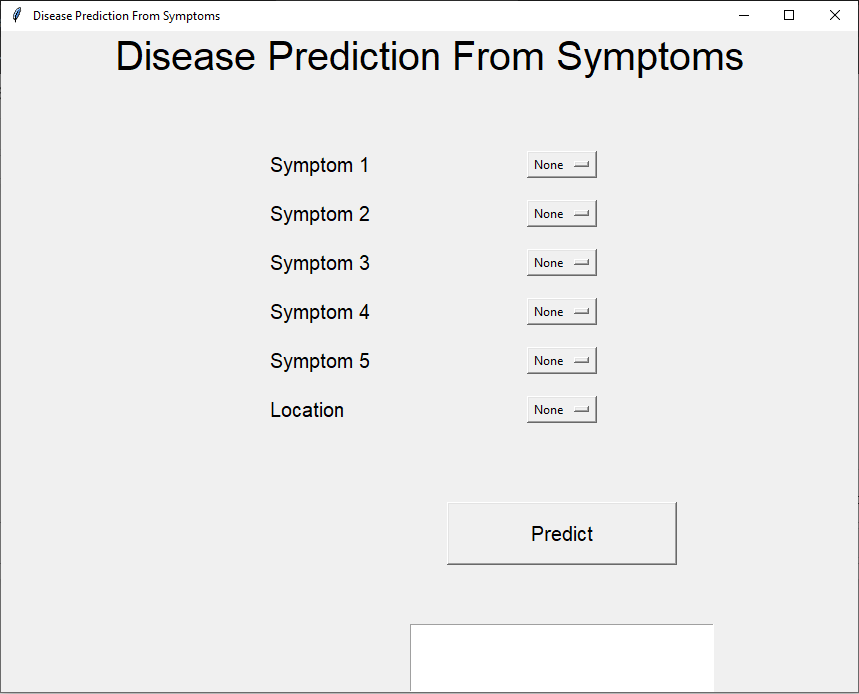

GUI used for taking user input. The drop downs show the list of symptoms from which the user can choose.

<h2>Output Predicted and sent to Thingspeak</h2>

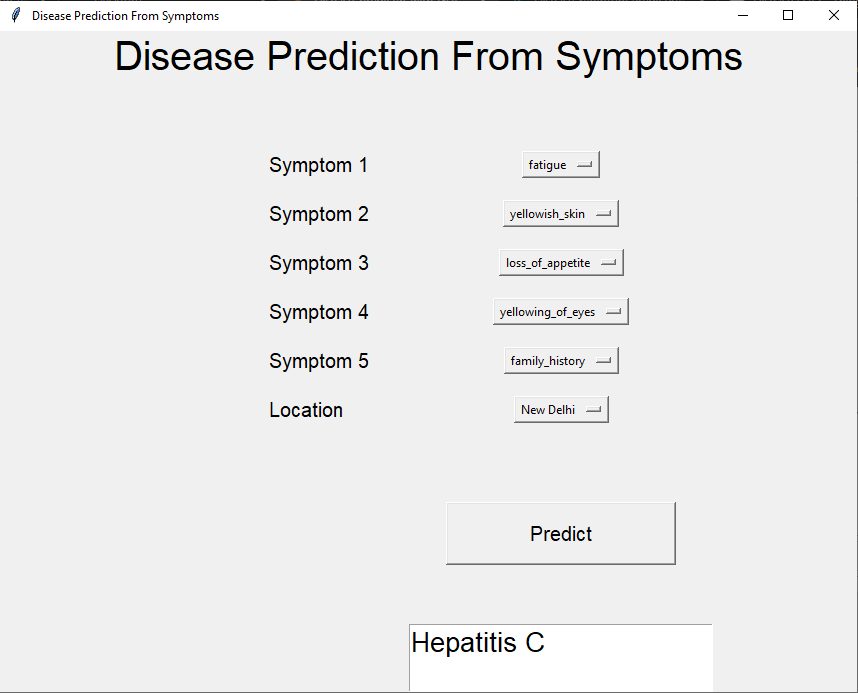

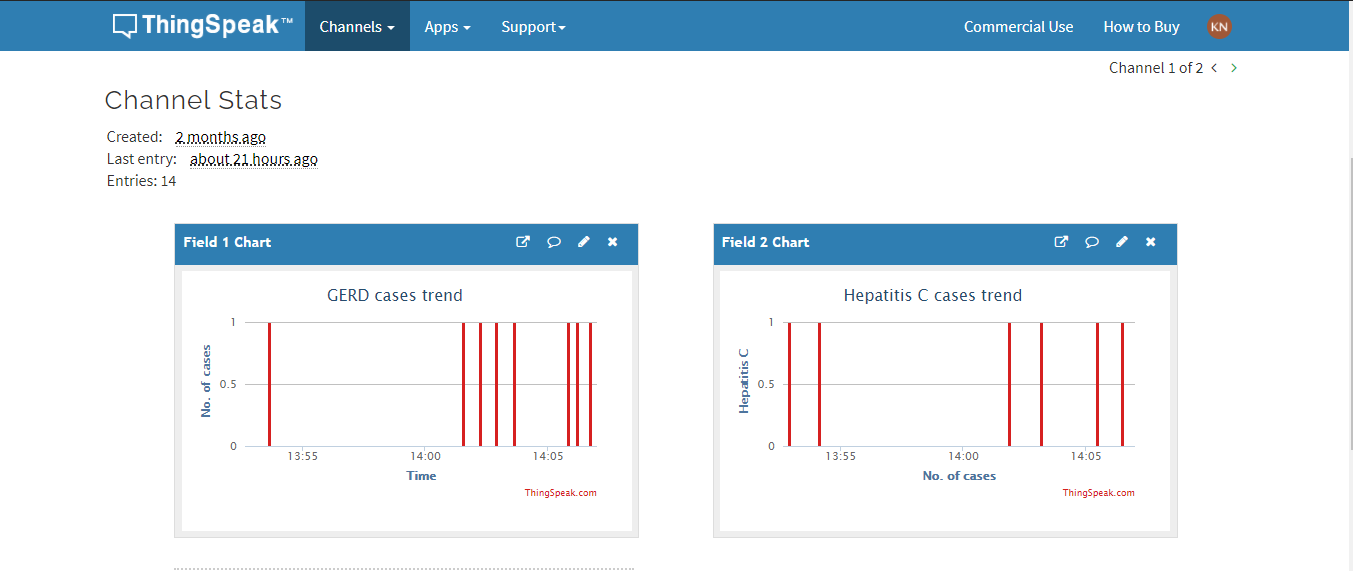

<h2>Analytics Dashboard using Tableau software</h2>

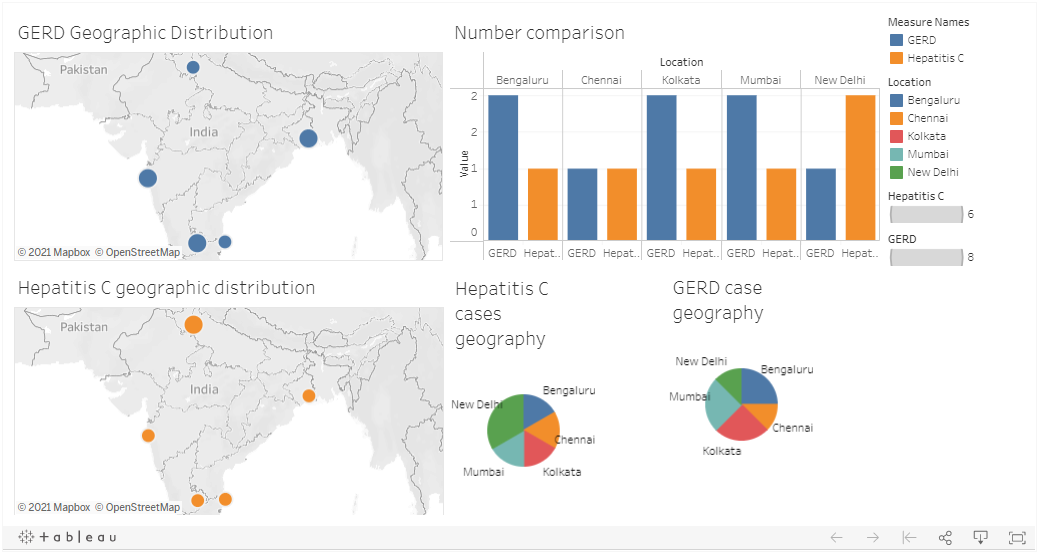

This dashboard and indivisual sheets can be viewed at https://public.tableau.com/views/DiseaseDashboard_16216759756860/Dashboard1?:language=en&:display_count=y&:origin=viz_share_link